In [1]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
import PyComplexHeatmap
print(PyComplexHeatmap.__version__)
from PyComplexHeatmap import *

1.6.8.dev9+gebbf9f8.d20240402


In [2]:
#set font to Arial using the following code
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
# set pdf.fonttype to 42
plt.rcParams['pdf.fonttype']=42

## Generate dataset

In [3]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

## Add selected rows labels

-2.3922796080405453 2.7339942573307243


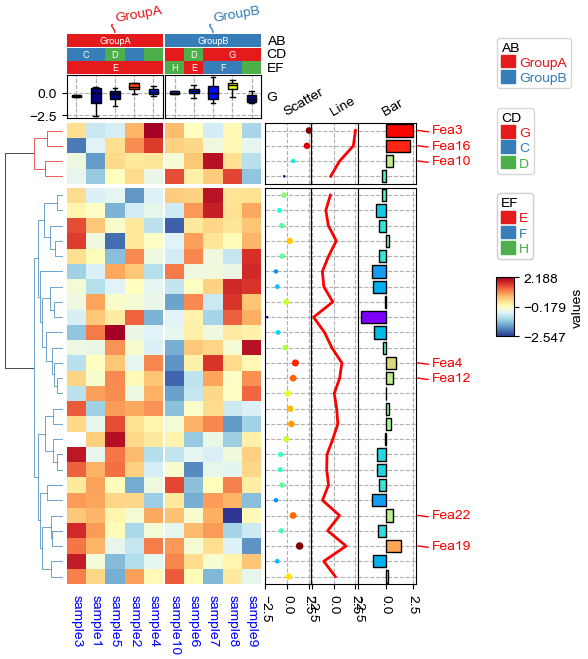

In [4]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
            Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                            height=12,cmap='jet',legend=False),
            Line=anno_lineplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                            height=12,colors='red',linewidth=2,legend=False),
            Bar=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                            height=15,cmap='rainbow',legend=False),
            selected=anno_label(df_rows,colors='red',relpos=(-0.05,0.4)),
            label_kws={'rotation':30,'horizontalalignment':'left','verticalalignment':'bottom'},
            axis=0,verbose=0)

col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=10),
            AB=anno_simple(df.AB,add_text=True),axis=1,
            CD=anno_simple(df.CD,add_text=True),
            EF=anno_simple(df.EF,add_text=True,
                            legend_kws={'frameon':True}),
            G=anno_boxplot(df_box, cmap='jet',legend=False),
            verbose=0)

print(np.nanmin(df_heatmap),np.nanmax(df_heatmap))

plt.figure(figsize=(5.5, 6.5))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, z_score=0,
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,col_dendrogram=False,row_dendrogram_size=15,
        show_rownames=False,show_colnames=True,
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='RdYlBu_r',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.savefig("example0.pdf", bbox_inches='tight')
plt.show()

## Add float annotations on the top of heatmap cells

             AB CD EF         F
sample1  GroupA  C  E  1.466779
sample2  GroupA  C  E -1.718396
sample3  GroupA  C  E -1.125512
sample4  GroupA  D  E -1.178352
sample5  GroupA  D  E  0.531655
sample1    -0.515284
sample2     0.825404
sample3    -0.316972
sample4     0.154741
sample5    -0.295485
sample6     0.162797
sample7     0.140349
sample8     0.638760
sample9    -0.580469
sample10    0.206190
dtype: float64
       sample1   sample2   sample3   sample4   sample5   sample6   sample7  \
Fea1  0.796799 -1.788291  0.068638 -0.578946 -0.270417 -1.581699 -0.265769   
Fea2  0.056618  0.008253       NaN -0.085056  0.790266 -0.762829 -0.391138   
Fea3 -1.070503  0.758421  0.296909  2.523378 -0.942157 -0.285012 -0.944490   
Fea4  0.062063 -0.202870 -0.530697  0.961247  0.589622  0.220465  1.406571   
Fea5  1.192260 -1.801859  2.469447 -0.681066 -0.312350  0.804042  1.204672   

       sample8   sample9  sample10  
Fea1  1.052278 -0.002042  1.521627  
Fea2 -0.733355 -0.136040 -0.148320  
Fea

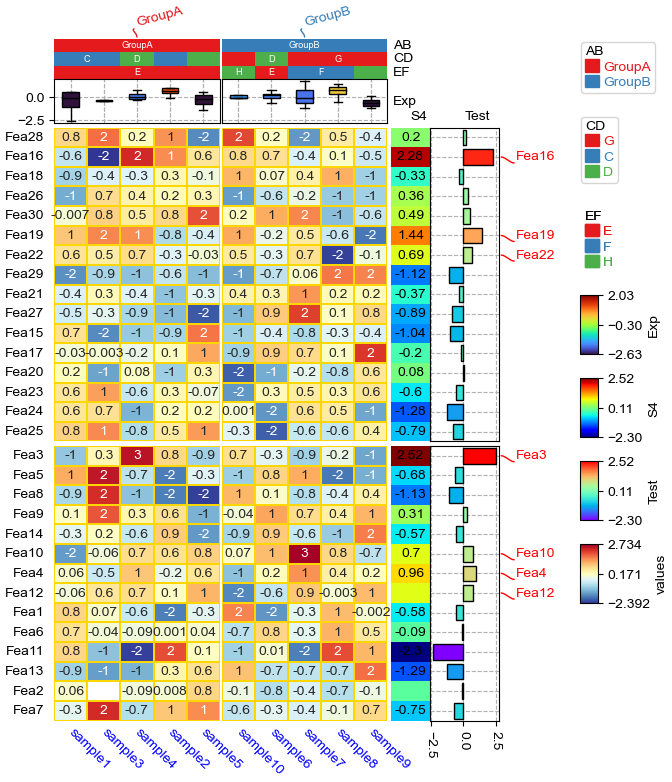

[['Fea28', 'Fea16', 'Fea18', 'Fea26', 'Fea30', 'Fea19', 'Fea22', 'Fea29', 'Fea21', 'Fea27', 'Fea15', 'Fea17', 'Fea20', 'Fea23', 'Fea24', 'Fea25'], ['Fea3', 'Fea5', 'Fea8', 'Fea9', 'Fea14', 'Fea10', 'Fea4', 'Fea12', 'Fea1', 'Fea6', 'Fea11', 'Fea13', 'Fea2', 'Fea7']]
[['sample1', 'sample3', 'sample4', 'sample2', 'sample5'], ['sample10', 'sample6', 'sample7', 'sample8', 'sample9']]


In [5]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                       add_text=True,height=10,
                       text_kws={'rotation':0,'fontsize':10,'color':'black'}),
            # Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
            #                  height=10),
            Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                        height=18,cmap='rainbow'),
            selected=anno_label(df_rows,colors='red'),
            axis=0,verbose=0,label_kws={'rotation':0,'horizontalalignment':'left','verticalalignment':'bottom'})

col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True),axis=1,
            CD=anno_simple(df.CD,add_text=True),
            EF=anno_simple(df.EF,add_text=True,
                            legend_kws={'frameon':False}),
            Exp=anno_boxplot(df_box, cmap='turbo'),
            verbose=0) #verbose=0 will turn off the log.

print(df.head())
print(df_box.mean(axis=1))
print(df_heatmap.head())
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
            data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
            col_split=df.AB,
            row_split=df_rows.XY, col_split_gap=0.5,row_split_gap=1,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=False,show_rownames=True,show_colnames=True,
             tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=7,
            annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()
print(cm.row_order)
print(cm.col_order)

## Only plot the annotations

In [6]:
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar2 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T2-A', 'T2-B'])
df_bar2.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T3-A', 'T3-B'])
df_bar3.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3.iloc[5,0]=np.nan
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan
print(df)
print(df_box.head())
print(df_scatter)
print(df_bar)
print(df_bar1)
print(df_bar2)
print(df_bar3)
print(df_bar4)

              AB CD         F
sample1    AAAA1  C  0.331981
sample2    AAAA1  C -0.180977
sample3    AAAA1  C  0.200994
sample4    AAAA1  D  1.937411
sample5    AAAA1  D  0.687755
sample6   BBBBB2  D -1.110735
sample7   BBBBB2  G  0.768647
sample8   BBBBB2  G -0.010206
sample9   BBBBB2  G  1.043266
sample10  BBBBB2  G  0.722602
            Gene1     Gene2     Gene3     Gene4
sample1 -1.880314  0.559509  0.169461 -1.150272
sample2  1.852287 -1.550741 -0.430236  0.106129
sample3  0.374510  0.525569 -2.087459  1.255954
sample4 -1.822967 -0.991702  0.715877 -1.237726
sample5 -0.551668 -1.385481 -0.267626 -1.266019
           Scatter
sample1   4.659584
sample2   5.749833
sample3   5.138717
sample4   7.469944
sample5   1.993612
sample6   0.591032
sample7   3.131566
sample8   8.811348
sample9   1.527524
sample10  5.137574
              TMB1      TMB2
sample1   6.796904  2.803695
sample2   6.574642  2.514294
sample3   2.807331  8.736264
sample4   6.672179  7.369024
sample5   9.164252  7.581861

Starting plotting HeatmapAnnotations


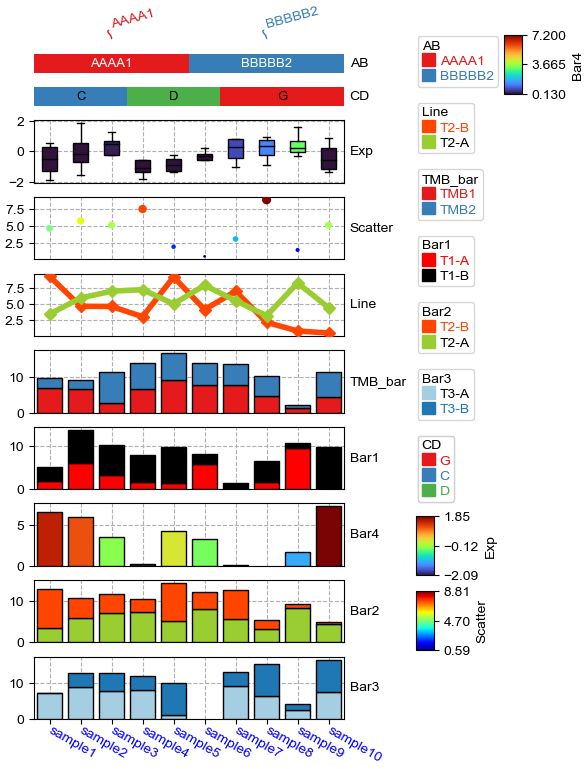

In [7]:
plt.figure(figsize=(4, 8))
col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True), axis=1,
            CD=anno_simple(df.CD, add_text=True,text_kws={'color':'black'}),
            Exp=anno_boxplot(df_box, cmap='turbo'),
            Scatter=anno_scatterplot(df_scatter,legend=True), 
            Line=anno_lineplot(df_bar2,linewidth=4,colors={'T2-B':'orangered','T2-A':'yellowgreen'},
                              marker='D',legend=True),  #colors=['orangered','yellowgreen']
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,colors=['red','black']), #colors can be str, list, tuple or dict
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,colors={'T2-B':'orangered','T2-A':'yellowgreen'}),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            plot=True,legend=True,legend_gap=5,hgap=4)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

## Change orentation to `down` and add extra space

Starting plotting HeatmapAnnotations


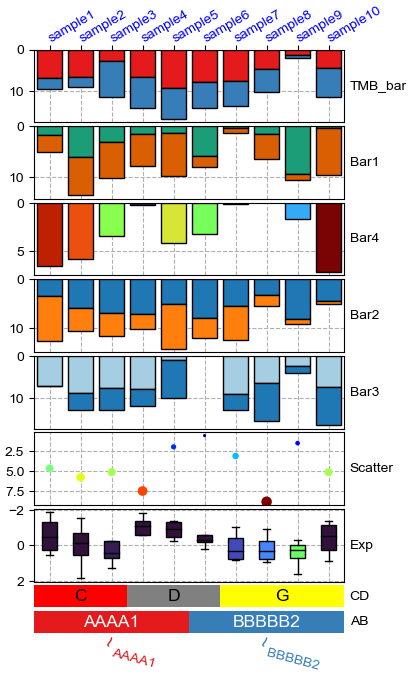

In [8]:
plt.figure(figsize=(4, 8))
row_ha = HeatmapAnnotation(
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            Scatter=anno_scatterplot(df_scatter), 
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'yellow'},
                           add_text=True,legend=True,text_kws={'color':'black'}),
            AB=anno_simple(df.AB,add_text=True,legend=True),
            label=anno_label(df.AB, merge=True,rotation=-15),
            plot=True,plot_legend=False,legend_hpad=13,axis=1,hgap=1
            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=30)
plt.show()
# Here, we can use hgap (when axis=1) or wgap (when axis=0) to control the widh of height space between different annotations.

## Change orentation to the left

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


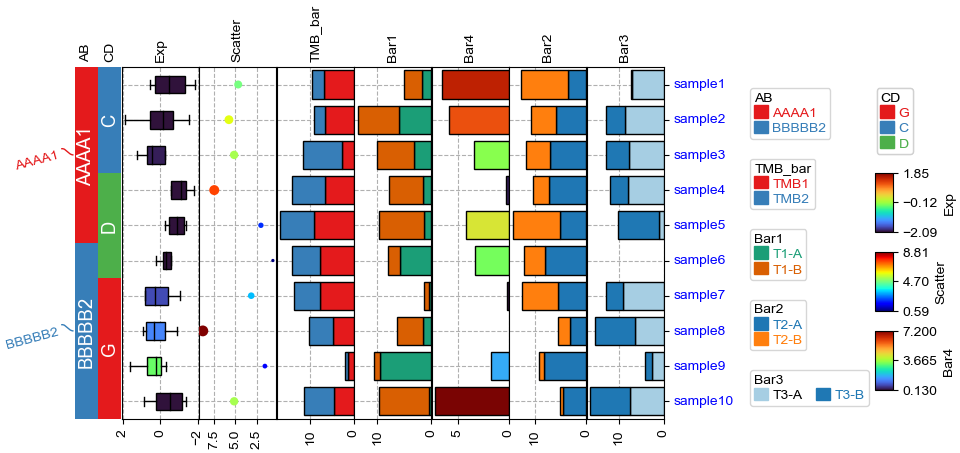

In [9]:
plt.figure(figsize=(8, 4))
row_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True,legend=True,
                           #text_kws=dict(bbox={"pad":0},va='center',ha='center',rotation_mode='anchor')
                          ),
            CD=anno_simple(df.CD,add_text=True,legend=True),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            plot=True,legend=True,legend_gap=5,
            axis=0,legend_hpad=20
            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=0)
plt.show()

## Change orentation to the right

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


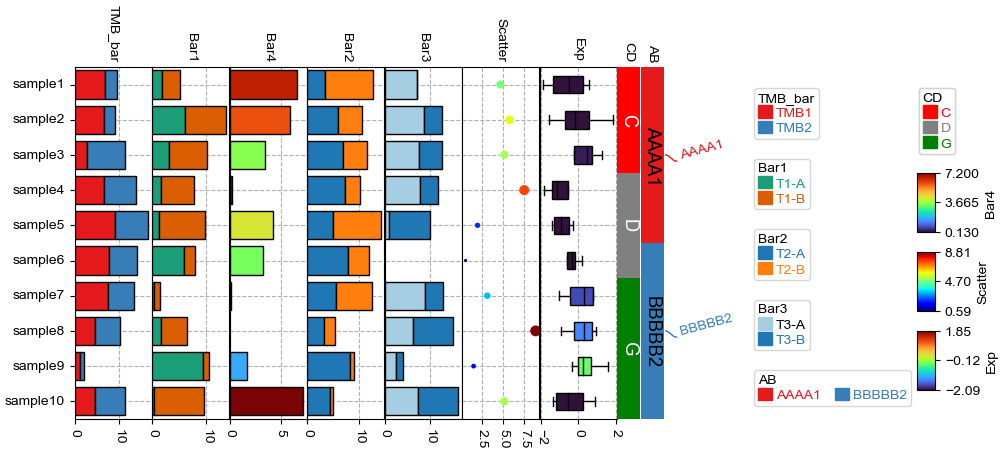

In [10]:
plt.figure(figsize=(8, 4))
row_ha = HeatmapAnnotation(
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            Scatter=anno_scatterplot(df_scatter), 
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'green'},
                           add_text=True,legend=True,
                           text_kws={'rotation':-90}),
            AB=anno_simple(df.AB,add_text=True,legend=True,
                           text_kws={'rotation':-90,'color':'black'}),
            label=anno_label(df.AB, merge=True,rotation=15),
            plot=True,legend=True,legend_hpad=13,legend_gap=5,axis=0
            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'black'},rotation=0)
plt.show()

## Changing orientation using parameter `orientation` 
By Default, if there is no `anno_label` in the annotation, the oriention would be determined by parameter `orientation`.

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


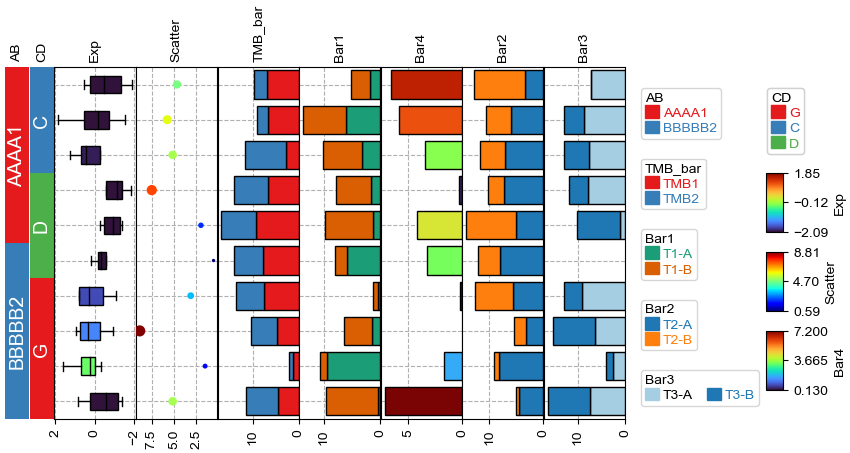

In [11]:
plt.figure(figsize=(8, 4))
col_ha = HeatmapAnnotation(
            AB=anno_simple(df.AB,add_text=True,legend=True),
            CD=anno_simple(df.CD,add_text=True,legend=True),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            plot=True,legend=True,axis=0,
            legend_gap=5,orientation='left',
            )
plt.show()

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


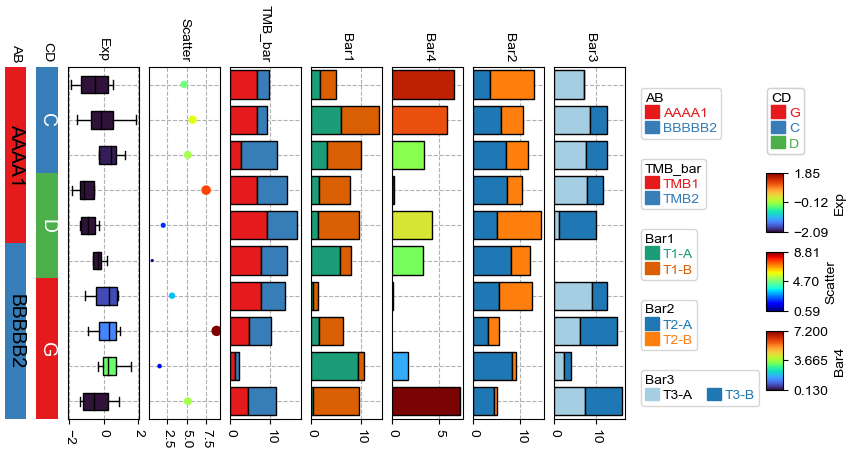

In [12]:
plt.figure(figsize=(8, 4))
col_ha = HeatmapAnnotation(
            AB=anno_simple(df.AB,add_text=True,legend=True,
                          text_kws={'rotation':-90,'fontsize':14,'color':'black'}),
            CD=anno_simple(df.CD,add_text=True,legend=True,
                          text_kws={'rotation':-90,'fontsize':14,'color':'white'}),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            plot=True,legend=True,axis=0,wgap=3,
            legend_gap=5,orientation='right',
            )
plt.show()

## Add multiple heatmap annotations using `for` loop
Typically, we can create a heatmap annotatin using the following code:<br>

```python

col_ha = HeatmapAnnotation(
                        Group=anno_simple(df_cols.hypomethylated_samples,colors=sample_group_color_dict,legend=True),
                        CellType=anno_simple(df_cols.CellType,colors=ct_color_dict,legend=ct_legend),
                        M1=anno_simple(df_cols['M1'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M1'}),
                        verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})
```
<br>
But what if we have many annotations, for example:<br>

```python

col_ha = HeatmapAnnotation(
                        Group=anno_simple(df_cols.hypomethylated_samples,colors=sample_group_color_dict,legend=True),
                        CellType=anno_simple(df_cols.CellType,colors=ct_color_dict,legend=ct_legend),
                        M1=anno_simple(df_cols['M1'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M1'}),
                        M2=anno_simple(df_cols['M2'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M2'}),
                        M3=anno_simple(df_cols['M3'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M3'}),
                        .....
                        verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})
```

<br>

In this case, we can create an dict including the name and annotation as keys and values:<br>

```python
col_ha_dict={
                'Group':anno_simple(df_cols.hypomethylated_samples,colors=sample_group_color_dict,legend=True),
                'CellType':anno_simple(df_cols.CellType,colors=ct_color_dict,legend=ct_legend)
                }


for col in sample_cols:
    col_ha_dict[col]=anno_simple(df_cols[col],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':col})
    
col_ha = HeatmapAnnotation(**col_ha_dict,
                           verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

```

## Cluster between groups and cluster within groups
Similar to `cluster_between_groups` and `cluster_within_groups` in R (https://jokergoo.github.io/2021/03/05/cluster-groups-in-complexheatmap/)

### clsuter within groups: `col_split=*, col_cluster=True`

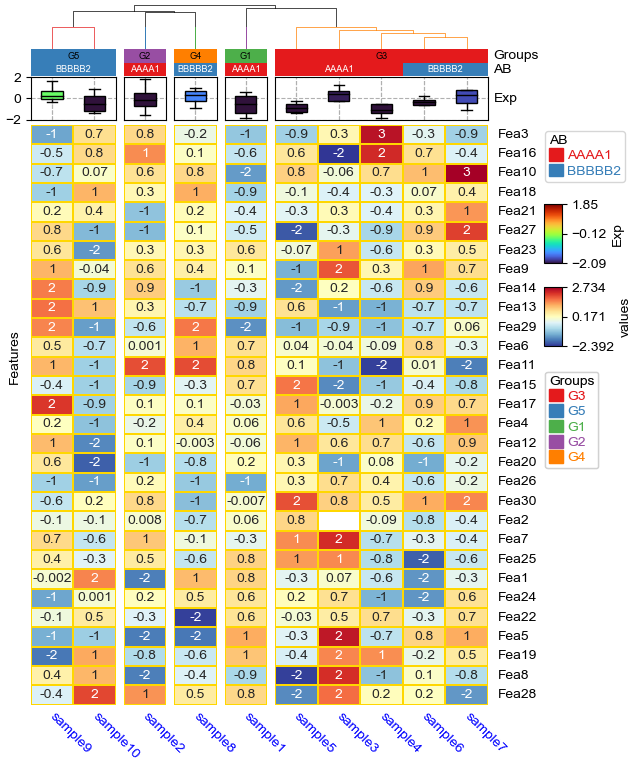

In [13]:
df['Groups']=['G1']+['G2']+['G3']*5+['G4']+['G5']*2
col_ha = HeatmapAnnotation(
            Groups=anno_simple(df.Groups,add_text=True,text_kws={'color':'black'}),
            AB=anno_simple(df.AB,add_text=True),axis=1,
            Exp=anno_boxplot(df_box, cmap='turbo'),
            verbose=0) #verbose=0 will turn off the log.


plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        col_split=df.Groups,col_split_gap=2,
        col_cluster=True,row_cluster=True,col_dendrogram=True,
        label='values',show_rownames=True,show_colnames=True,
        tree_kws={'col_cmap': 'Set1'},verbose=0,legend_gap=7,
        annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
        ylabel='Features')
plt.show()

### cluster_between_groups: `col_split=*, col_split_order="cluster_between_groups",col_cluster=False`

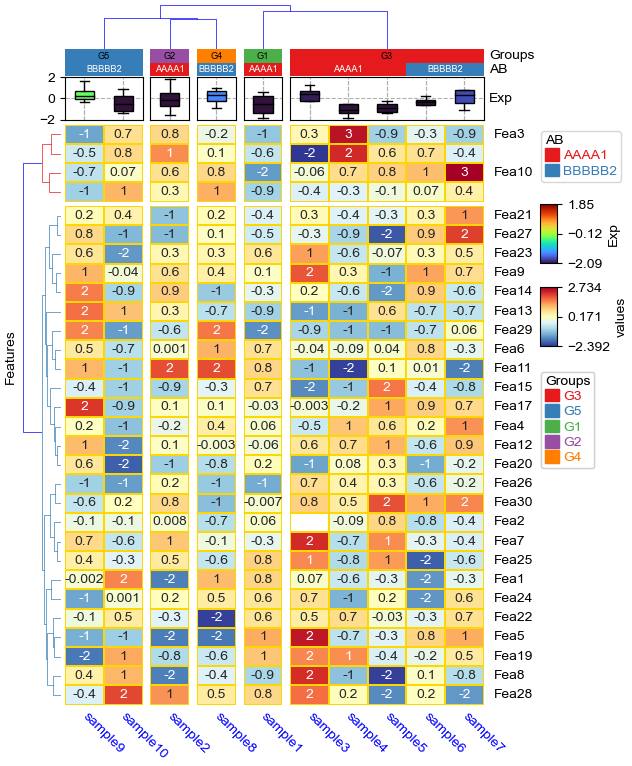

In [14]:
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        col_split=df.Groups, col_split_order="cluster_between_groups",
        col_split_gap=2,col_cluster=False,
        row_cluster=True,col_dendrogram=True,
        row_split=2,row_split_gap=1,row_dendrogram=True,
        label='values',show_rownames=True,show_colnames=True,
        tree_kws={'colors':'blue','row_cmap':'Set1','col_cmap':'Paired'},
        verbose=0,legend_gap=7,
        annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
        ylabel='Features')
plt.show()

### cluster_within_groups && cluster_between_groups: `col_split=*, col_split_order="cluster_between_groups",col_cluster=True`

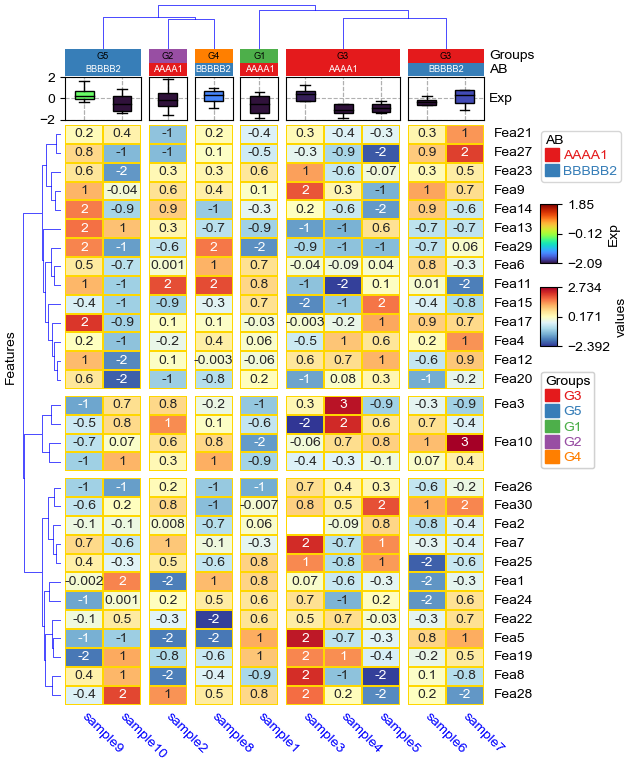

In [15]:
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        col_split=df.loc[:,['AB','Groups']], col_split_order="cluster_between_groups",
        col_split_gap=2,col_cluster=True,row_split_gap=1.5,
        row_split=3,#row_split_order='cluster_between_groups',
        row_cluster=True,col_dendrogram=True,row_dendrogram=True,
        label='values',show_rownames=True,show_colnames=True,
        tree_kws={'colors':'blue'},verbose=0,legend_gap=7,
        annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
        ylabel='Features')
plt.show()

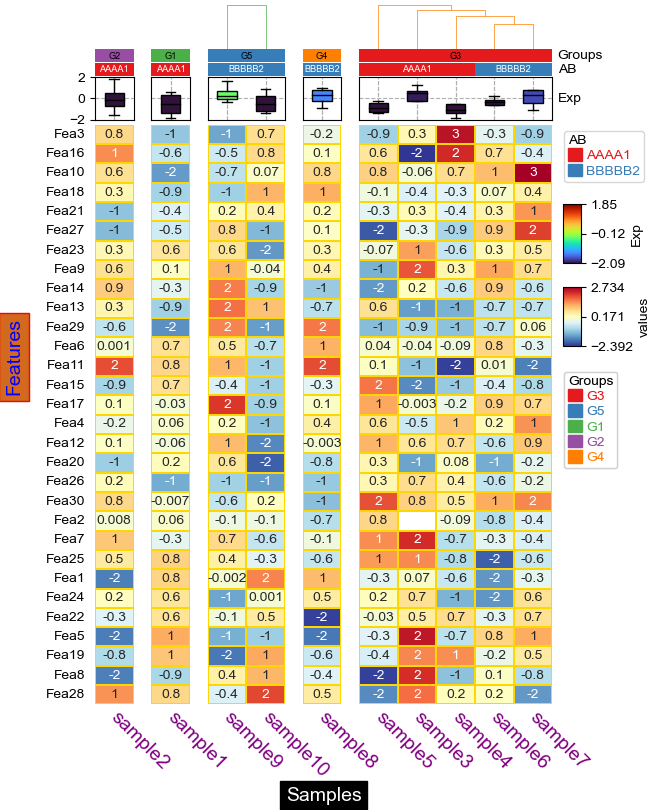

In [16]:
# `label_kws` in `HeatmapAnnotation` control the heatmap annotaiton labels
col_ha = HeatmapAnnotation(
                Groups=anno_simple(df.Groups,add_text=True,text_kws={'color':'black'}),
                AB=anno_simple(df.AB,add_text=True),axis=1,
                Exp=anno_boxplot(df_box, cmap='turbo'),
                verbose=0,label_side='right'
)

# `xticklabels_kws` and `yticklabels_kws` control the ticklabels for the heatmap.
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,
                       col_split=df.Groups,col_split_order=['G2','G1','G5','G4','G3'],
                       col_split_gap=4.5,col_cluster=True,
                       row_cluster=True,col_dendrogram=True,
                       label='values',show_rownames=True,show_colnames=True,
                       row_names_side='left',
                       tree_kws={'col_cmap':'Set1'},verbose=0,legend_gap=7,
                       annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
                       xticklabels_kws=dict(labelrotation=-45,labelcolor='purple',labelsize=14),
                       #more parameters for [x/y]_ticklabels_kws, see: matplotlib.axes.Axes.tick_params or ?ax.tick_params
                       xlabel='Samples',ylabel="Features",
                       xlabel_kws=dict(color='white',fontsize=14),
                       ylabel_kws=dict(color='blue',fontsize=14,labelpad=45), #increace labelpad manually using labelpad (points)
                       xlabel_bbox_kws=dict(facecolor='black'),
                       ylabel_bbox_kws=dict(facecolor='chocolate',edgecolor='red'),
                      )
plt.savefig("test.pdf",bbox_inches='tight')
plt.show()

## Custom annotation

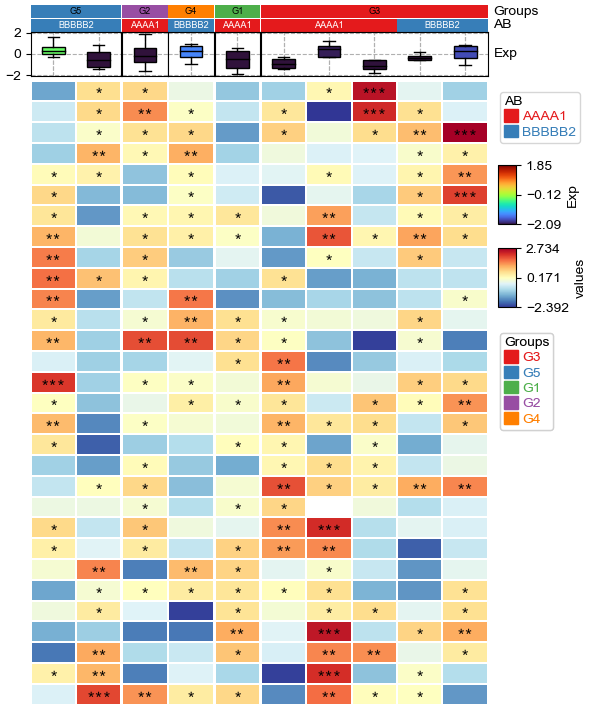

In [17]:
annot=df_heatmap.applymap(lambda x:'∗∗∗' if x >= 2 else '∗∗' if x >=1 else '∗' if x >0 else '')
# To make asterisk located at center in vertical, use ∗ ASTERISK OPERATOR. instead of normal *; see: https://unicode-explorer.com/c/2217
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        annot=annot,fmt=None,annot_kws={'color':'black','fontname':'Courier'},
        col_split=df.Groups, col_split_order="cluster_between_groups",
        col_cluster=True,row_cluster=True,
        label='values',
        tree_kws={'col_cmap': 'Set1'},verbose=0,legend_gap=7,
        linewidths=0.05,linecolor='white',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()

## Custom linkage

df_heatmap shape: (30, 10) 
linkage shape: (9, 4) 
 [[ 5.          7.         17.35736787  2.        ]
 [ 3.          6.         18.02642008  2.        ]
 [ 1.          4.         19.38015266  2.        ]
 [ 8.         10.         19.71470769  3.        ]
 [ 9.         11.         20.10246451  3.        ]
 [ 2.         14.         20.54621873  4.        ]
 [ 0.         15.         21.14613731  5.        ]
 [12.         13.         22.04670714  5.        ]
 [16.         17.         22.4150953  10.        ]]


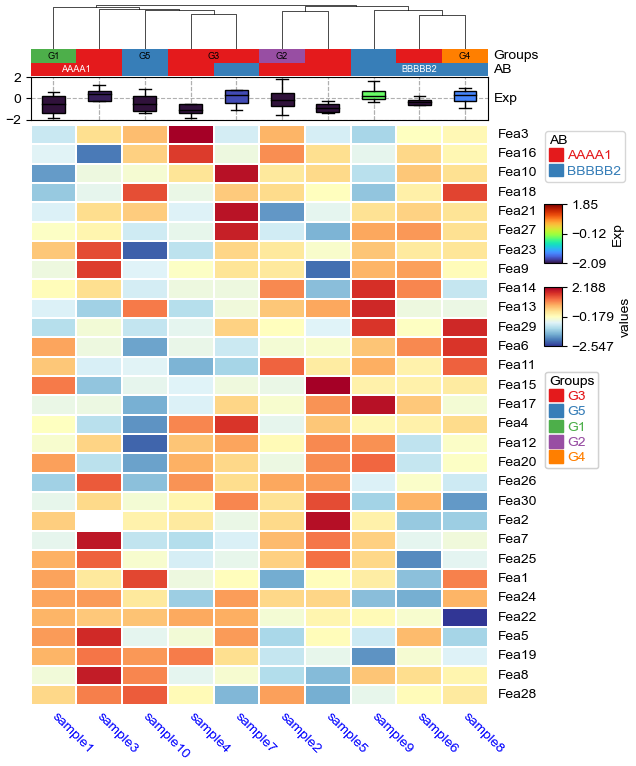

In [18]:
import fastcluster
# custom column linkage
linkage = fastcluster.linkage(df_heatmap.T.apply(lambda x:x.fillna(x.median()),axis=1), method='average', metric='canberra')
print("df_heatmap shape:",df_heatmap.shape,"\nlinkage shape:",linkage.shape,"\n",linkage)

plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,z_score=0,
        col_cluster=True,row_cluster=True,show_rownames=True,show_colnames=True,
        label='values',col_dendrogram_kws=dict(linkage=linkage),col_dendrogram=True,
        tree_kws={'col_cmap': 'Set1'},verbose=0,legend_gap=7,
        linewidths=0.05,linecolor='white',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()

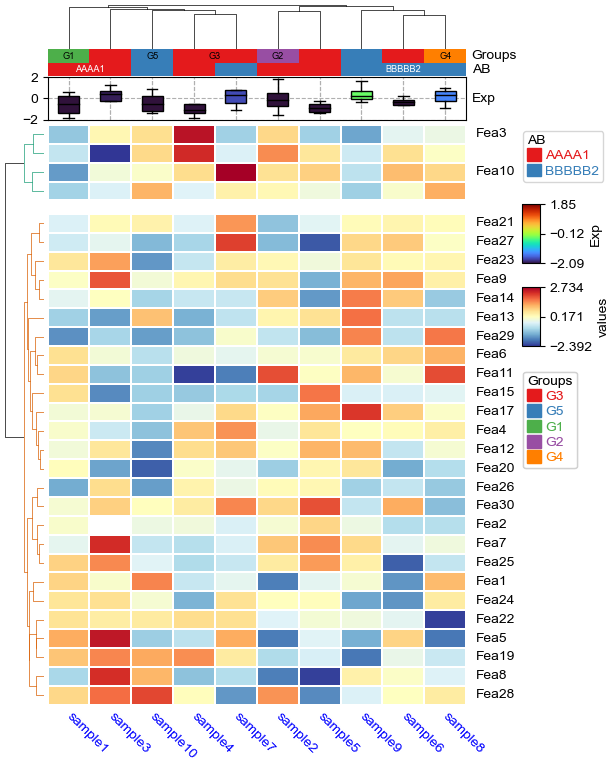

In [19]:
df['Groups']=['G1']+['G2']+['G3']*5+['G4']+['G5']*2
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        col_cluster=True,row_cluster=True,show_rownames=True,show_colnames=True,
        row_split=2,row_split_gap=3,row_dendrogram=True,
        label='values',col_dendrogram_kws=dict(linkage=linkage),col_dendrogram=True,
        tree_kws={'col_cmap': 'Set1','row_cmap':'Dark2'},verbose=0,legend_gap=7,
        linewidths=0.05,linecolor='white',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()

## Image annotation

In [20]:
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar2 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T2-A', 'T2-B'])
df_bar2.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T3-A', 'T3-B'])
df_bar3.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3.iloc[5,0]=np.nan
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan
df_img = pd.DataFrame([f"1.jpeg" for i in range(1,11)], columns=['path'])
df_img.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
# print(df)
# print(df_box.head())
# print(df_scatter)
print(df_img)

            path
sample1   1.jpeg
sample2   1.jpeg
sample3   1.jpeg
sample4   1.jpeg
sample5   1.jpeg
sample6   1.jpeg
sample7   1.jpeg
sample8   1.jpeg
sample9   1.jpeg
sample10  1.jpeg


Starting plotting HeatmapAnnotations


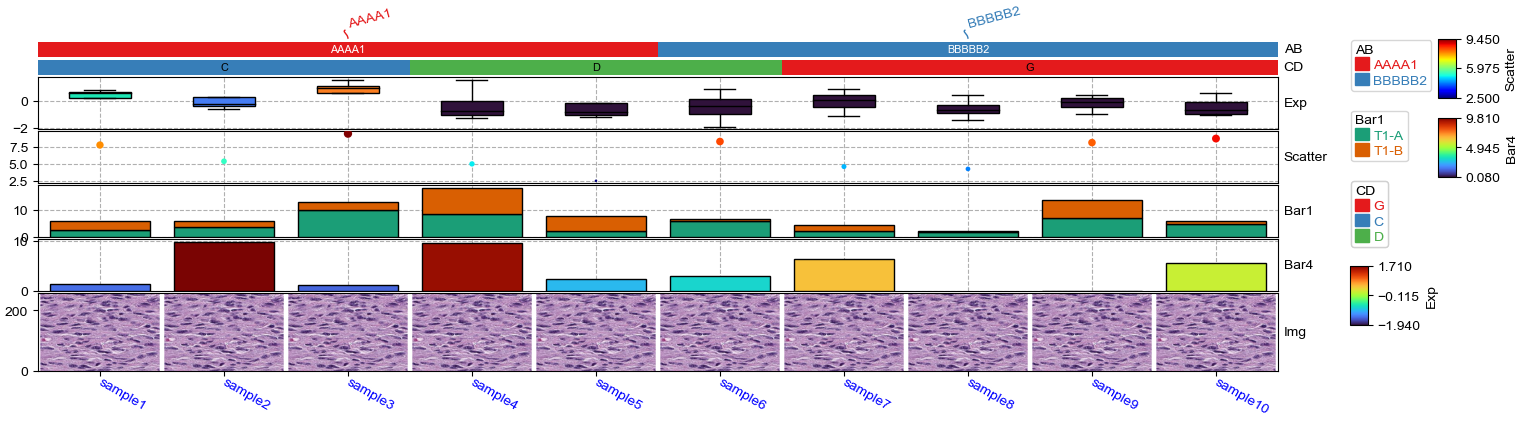

In [21]:
plt.figure(figsize=(16, 4))
col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
            CD=anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Img=anno_img(df_img.path,border_width=5,border_color=255,height=15),
            plot=True,legend=True,legend_gap=5,hgap=0.5)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

## Choosing Build-in colormap in PyComplexHeatmap

### Diverging
- exp1
- exp2
- meth1
- meth2
- diverging1
- parula

In [22]:
from PyComplexHeatmap.utils import get_colormap

In [23]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

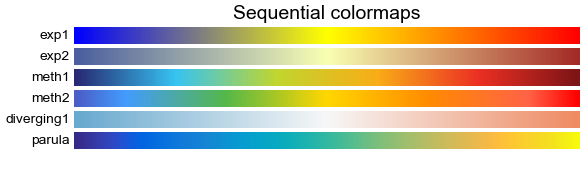

In [24]:
plot_color_gradients('Sequential',
                     ['exp1', 'exp2', 'meth1', 'meth2', 'diverging1', 'parula'])

### Qualitative
- cmap50

In [25]:
# get_colormap("cmap50") # 50 different colors

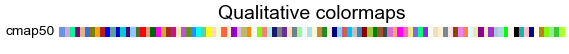

In [26]:
plot_color_gradients('Qualitative',
                     ['cmap50'])

### How to use the Build-in cmap?

Just set cmap="custom_cmap"

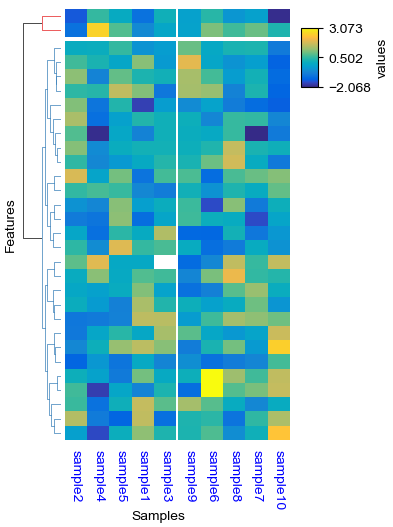

In [27]:
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]

df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(
        data=df_heatmap,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, 
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,
        show_rownames=False,show_colnames=True,
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='parula',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'},
        ylabel="Features",xlabel="Samples")
# plt.savefig("example0.pdf", bbox_inches='tight')
plt.show()

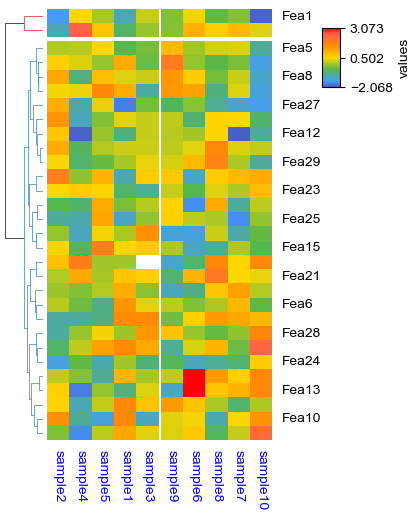

In [28]:
plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(
        data=df_heatmap,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, 
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,
        show_rownames=True,show_colnames=True,row_names_side='right',
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='meth2',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.show()

## How to force display all row/col ticklabels?
When the height or width is not big enough to display all xticklabels and yticklabels, some ticklabels will be hidden to avoid overlapping.
For example:

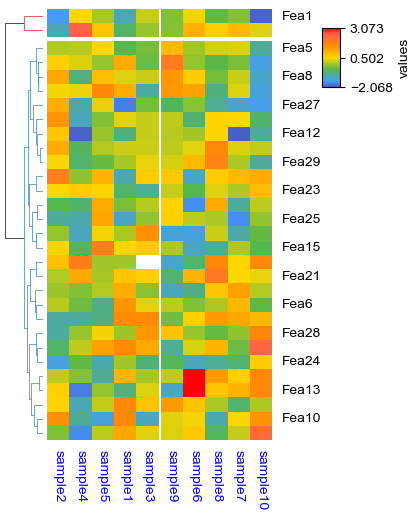

In [29]:
plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(
        data=df_heatmap,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, 
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,
        show_rownames=True,show_colnames=True,row_names_side='right',
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='meth2',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.show()

To force display all ticklabels no matter whether the height or width is big enough, set parameters `xticklabels/yticklabels` to True:

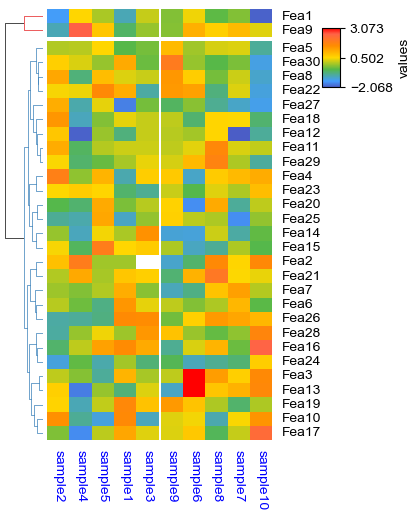

In [30]:
plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(
        data=df_heatmap,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, 
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,
        show_rownames=True,show_colnames=True,
        row_names_side='right',yticklabels=True,
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='meth2',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.show()